# Praktikum Visualisasi Statis

Notebook ini memandu praktik visualisasi statis menggunakan dataset bawaan seaborn. Tiap bagian mengenalkan tipe chart, kapan digunakan, serta contoh kode yang bisa langsung dijalankan.

## Setup & Cek Lingkungan
Sebelum memulai, aktifkan virtual environment agar paket terisolasi:
- Windows PowerShell: `.\venv\Scripts\Activate.ps1`
- macOS / Linux: `source venv/bin/activate`

Sel kode berikut memeriksa versi pustaka dan memuat dataset contoh (`diamonds`, `iris`, `tips`, `flights`) yang akan dipakai sepanjang notebook.

In [1]:
import sys, platform
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

print('Python:', sys.version.split()[0])
print('OS:', platform.platform())
print('pandas:', pd.__version__)
print('seaborn:', sns.__version__)
print('matplotlib:', matplotlib.__version__)

diamonds = sns.load_dataset('diamonds')
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

print(f'diamonds shape: {diamonds.shape}')
print(f'iris shape: {iris.shape}')
print(f'tips shape: {tips.shape}')
print(f'flights shape: {flights.shape}')

diamonds.head()

Python: 3.12.3
OS: Linux-6.6.87.2-microsoft-standard-WSL2-x86_64-with-glibc2.39
pandas: 2.3.2
seaborn: 0.13.2
matplotlib: 3.10.6
diamonds shape: (53940, 10)
iris shape: (150, 5)
tips shape: (244, 7)
flights shape: (144, 3)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Distribusi: Histogram, KDE, ECDF
Gunakan bagian ini untuk membaca bentuk distribusi variabel numerik:
- **Histogram** menunjukkan frekuensi per rentang nilai, cocok untuk overview kasar.
- **Transformasi log** membantu menormalkan data yang sangat miring (contoh: `price`).
- **KDE (Kernel Density Estimate)** memberikan kurva halus untuk melihat puncak distribusi.
- **ECDF (Empirical CDF)** menegaskan proporsi kumulatif dan memudahkan perbandingan kategori.
Perhatikan bagaimana parameter `bins`, `bw_adjust`, dan `hue` memengaruhi interpretasi.

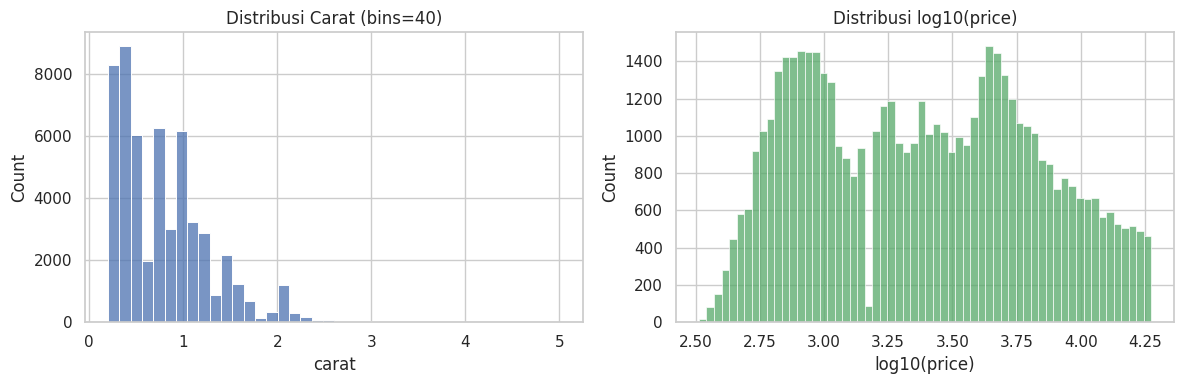

/tmp/ipykernel_13024/2275448022.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title='Cut', bbox_to_anchor=(1.02, 1), loc='upper left')


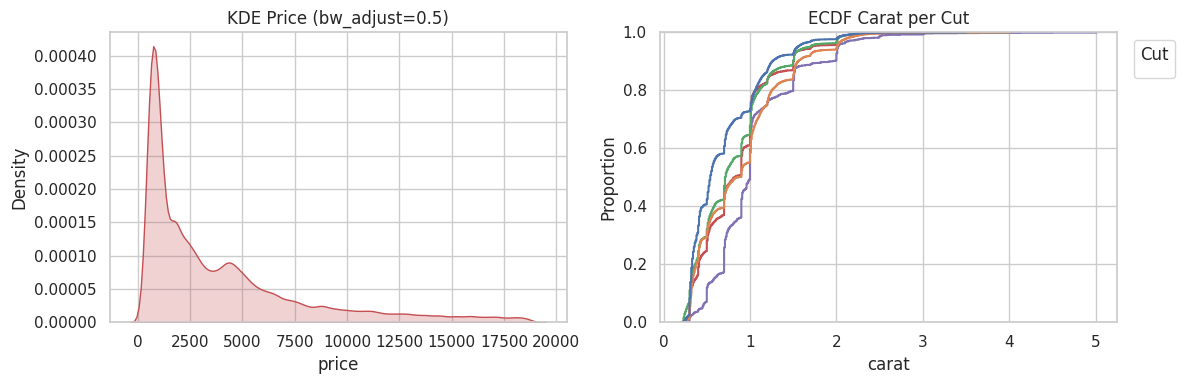

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=diamonds, x='carat', bins=40, color='#4C72B0', ax=axes[0])
axes[0].set_title('Distribusi Carat (bins=40)')

sns.histplot(np.log10(diamonds['price']), bins=60, color='#55A868', ax=axes[1])
axes[1].set_title('Distribusi log10(price)')
axes[1].set_xlabel('log10(price)')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(data=diamonds, x='price', fill=True, bw_adjust=0.5, color='#C44E52', ax=axes[0])
axes[0].set_title('KDE Price (bw_adjust=0.5)')

sns.ecdfplot(data=diamonds, x='carat', hue='cut', ax=axes[1])
axes[1].set_title('ECDF Carat per Cut')
axes[1].legend(title='Cut', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Distribusi: Boxplot, Violin, dan Strip Plot
Visual ini fokus pada sebaran per kategori:
- **Boxplot** merangkum median, kuartil, dan potensi outlier.
- **Violin plot** menambahkan bentuk distribusi (density) di atas stat summary.
- **Strip plot** menampilkan titik individu agar variasi mentah terlihat (gunakan sampling bila dataset besar).
Bandingkan kategori `cut` dan `color` pada dataset `diamonds` untuk membaca variasi harga dan karat.

/tmp/ipykernel_13024/822189587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diamonds, x='cut', y='price', palette='Blues', ax=axes[0])
/tmp/ipykernel_13024/822189587.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=diamonds, x='cut', y='carat', palette='Set2', inner='quartile', ax=axes[1])


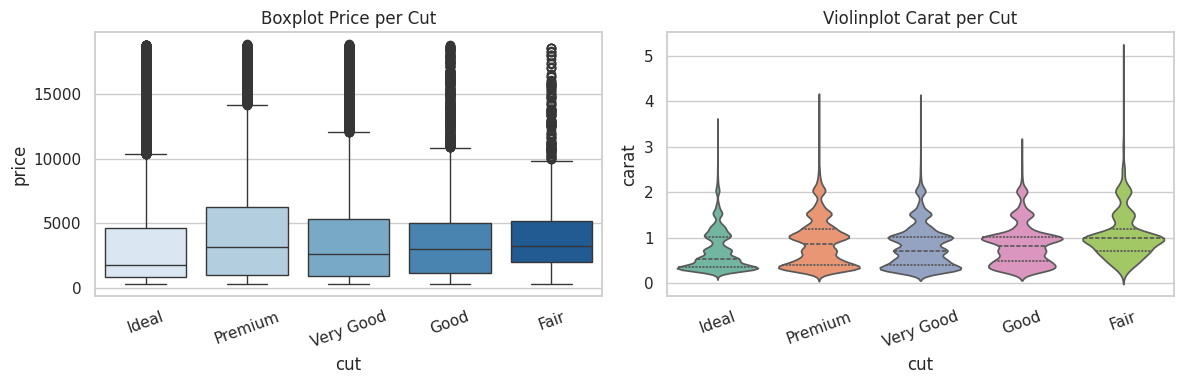

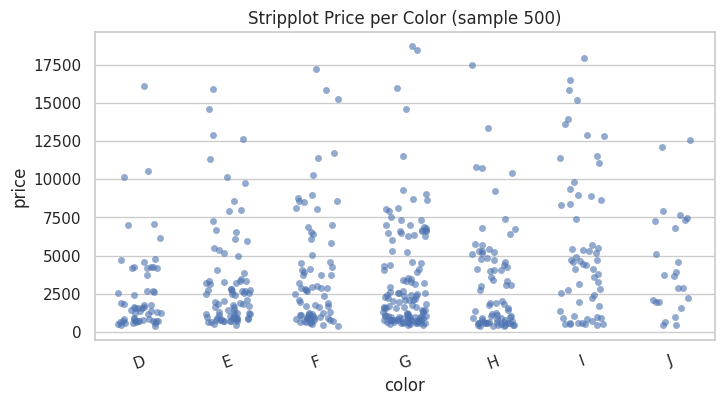

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data=diamonds, x='cut', y='price', palette='Blues', ax=axes[0])
axes[0].set_title('Boxplot Price per Cut')
axes[0].tick_params(axis='x', rotation=20)

sns.violinplot(data=diamonds, x='cut', y='carat', palette='Set2', inner='quartile', ax=axes[1])
axes[1].set_title('Violinplot Carat per Cut')
axes[1].tick_params(axis='x', rotation=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.stripplot(data=diamonds.sample(500, random_state=0), x='color', y='price', jitter=0.25, alpha=0.6)
plt.title('Stripplot Price per Color (sample 500)')
plt.xticks(rotation=20)
plt.show()

## Kategori: Bar dan Count Plot
Ketika variabel independen berupa kategori:
- **Count plot** menghitung frekuensi kemunculan tiap kategori.
- **Bar plot** dengan `estimator` (misal mean/median) merangkum nilai numerik per kategori.
- `catplot` memudahkan membuat grid/hue untuk melihat beberapa kategori sekaligus.
Gunakan rotasi label dan legenda yang jelas supaya chart tetap terbaca.

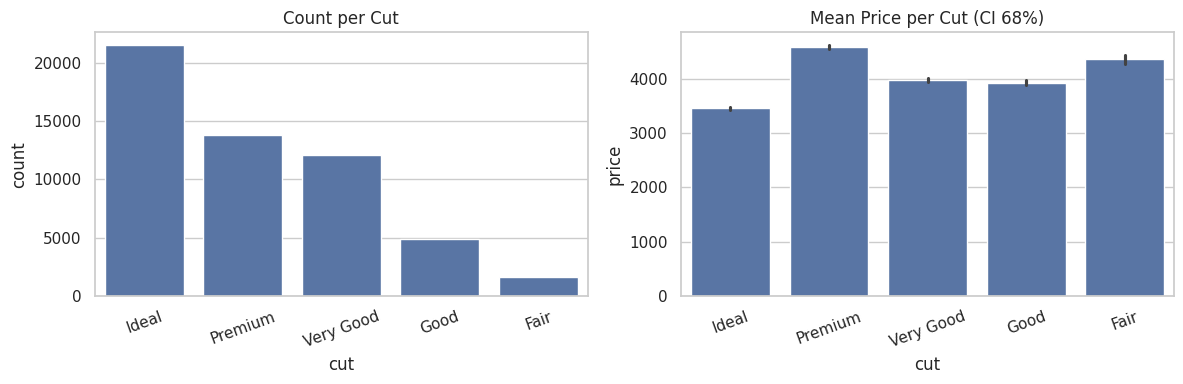

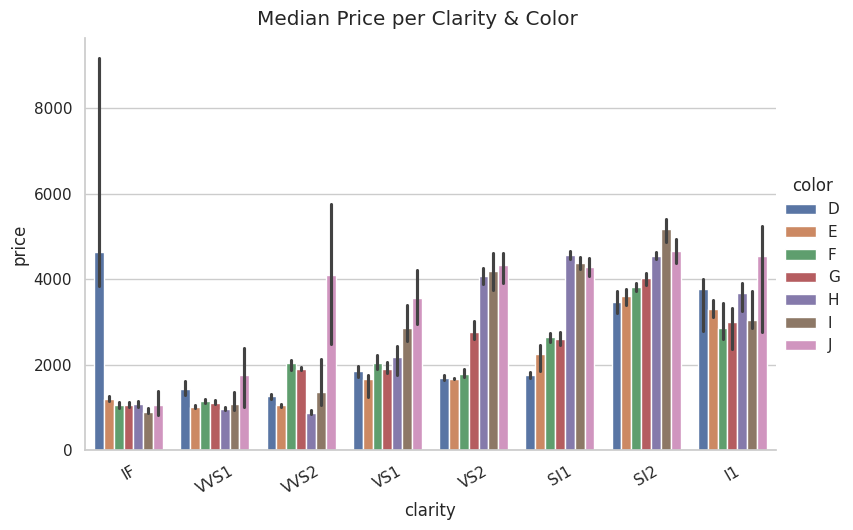

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=diamonds, x='cut', ax=axes[0])
axes[0].set_title('Count per Cut')
axes[0].tick_params(axis='x', rotation=20)

sns.barplot(data=diamonds, x='cut', y='price', estimator=np.mean, errorbar=('ci', 68), ax=axes[1])
axes[1].set_title('Mean Price per Cut (CI 68%)')
axes[1].tick_params(axis='x', rotation=20)
plt.tight_layout()
plt.show()

cat = sns.catplot(
    data=diamonds,
    x='clarity',
    y='price',
    hue='color',
    kind='bar',
    estimator=np.median,
    height=5,
    aspect=1.6,
)
cat.fig.suptitle('Median Price per Clarity & Color', y=1.02)
for ax in cat.axes.flat:
    ax.tick_params(axis='x', rotation=30)
plt.show()

## Relasi: Scatter, Regresi, dan Pairplot
Fokus pada hubungan antar variabel numerik:
- **Scatter plot** memperlihatkan pola dan perbedaan grup lewat `hue` atau `style`.
- **Regresi linear (lmplot)** memunculkan garis tren untuk menilai korelasi.
- **Pairplot** mengeksplorasi kombinasi variabel sekaligus, ideal untuk eksplorasi awal dataset kecil.
Pertimbangkan mensubset data jika titik sangat banyak agar performa tetap baik.

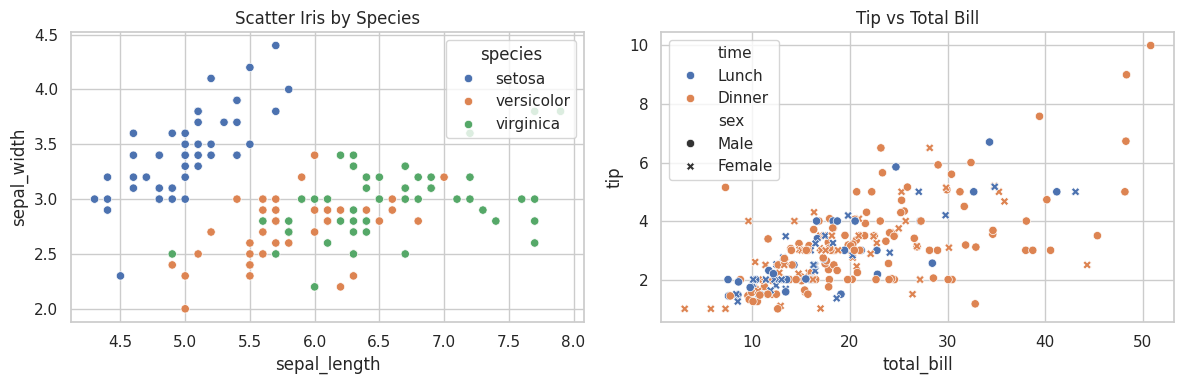

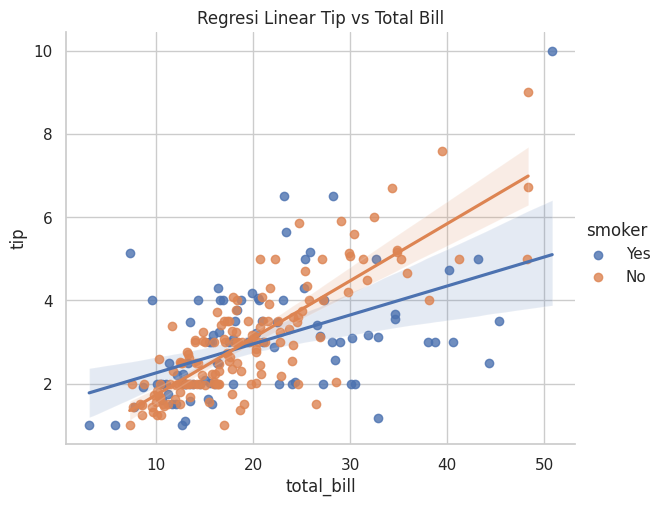

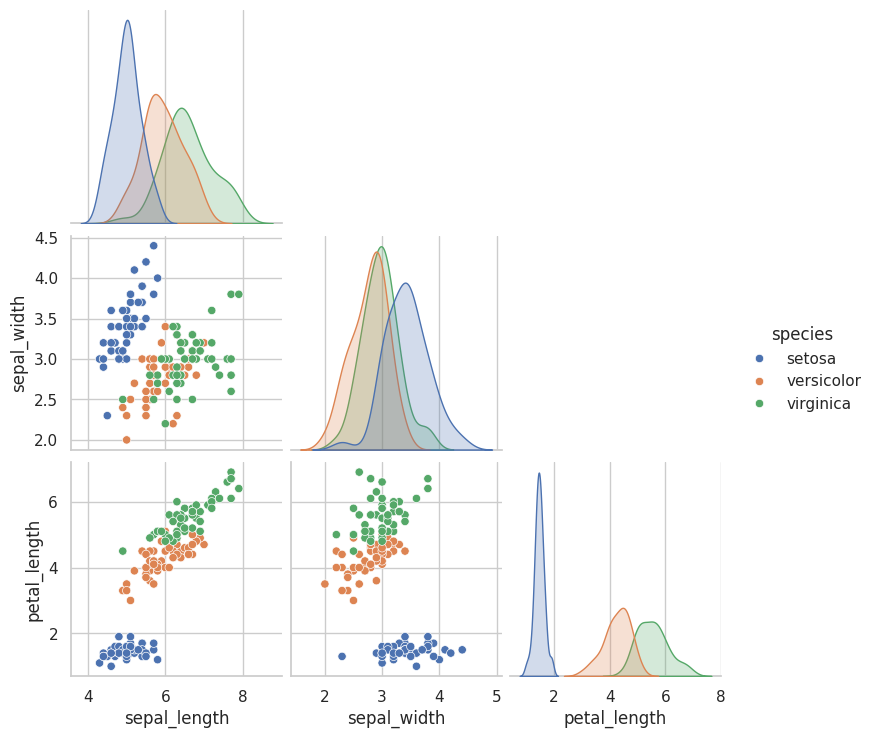

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', ax=axes[0])
axes[0].set_title('Scatter Iris by Species')

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='sex', ax=axes[1])
axes[1].set_title('Tip vs Total Bill')
plt.tight_layout()
plt.show()

sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', aspect=1.2)
plt.title('Regresi Linear Tip vs Total Bill')
plt.show()

sns.pairplot(iris, vars=['sepal_length', 'sepal_width', 'petal_length'], hue='species', corner=True)
plt.show()

## Tren Waktu: Line Chart & Area
Data berurutan (waktu/indeks) cocok divisualkan dengan:
- **Line chart multi-series** yang menyorot pola musiman per tahun.
- **Line + area** untuk menekankan aggregate (misal rata-rata penumpang per tahun) dan perubahan antar periode.
Gunakan urutan bulan yang eksplisit (`Categorical`) agar garis tidak teracak, dan tambahkan label sumbu yang jelas.

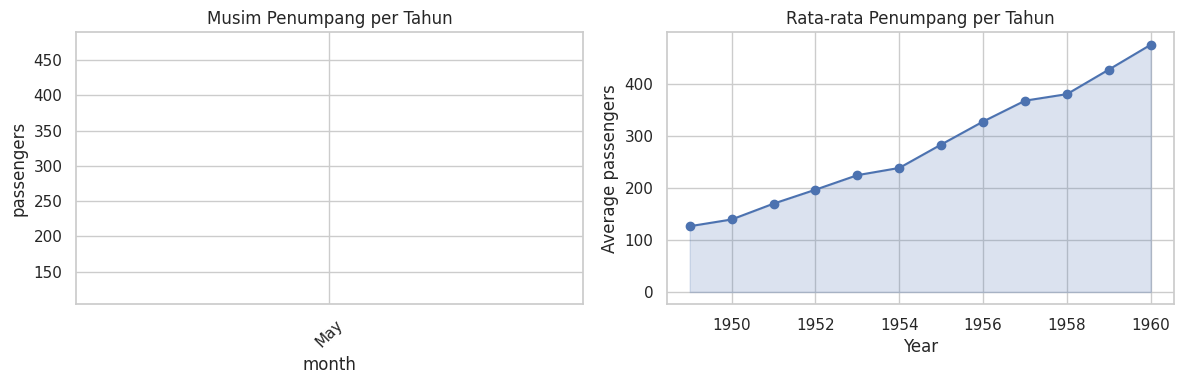

In [6]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
flights_ordered = flights.assign(
    month=pd.Categorical(flights['month'], categories=month_order, ordered=True)
)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=flights_ordered, x='month', y='passengers', hue='year', ax=axes[0], legend=False)
axes[0].set_title('Musim Penumpang per Tahun')
axes[0].tick_params(axis='x', rotation=45)

yearly_avg = flights_ordered.groupby('year')['passengers'].mean()
axes[1].plot(yearly_avg.index, yearly_avg.values, marker='o', color='#4C72B0')
axes[1].fill_between(yearly_avg.index, yearly_avg.values, alpha=0.2, color='#4C72B0')
axes[1].set_title('Rata-rata Penumpang per Tahun')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average passengers')
plt.tight_layout()
plt.show()

## Korelasi & Heatmap
Heatmap membantu mengidentifikasi pola antar variabel numerik:
- Korelasi `diamonds` memperlihatkan hubungan antar fitur seperti `carat` dan `price`.
- Pivot heatmap `flights` menegaskan pola musiman (bulan) sekaligus tren tahunan.
Sesuaikan `cmap`, anotasi (`annot`), dan ukuran figure supaya nilai mudah dibaca.

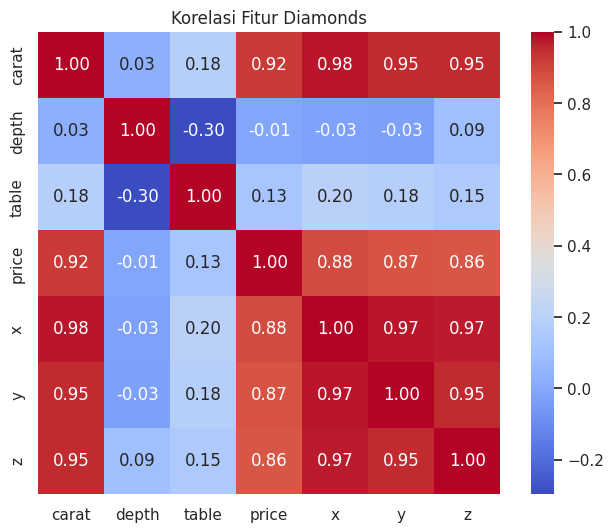

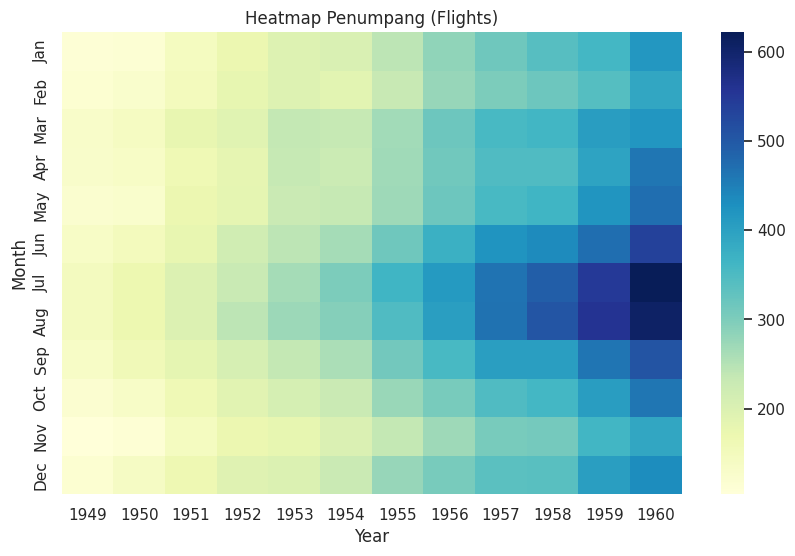

In [7]:
numeric_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
corr = diamonds[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Korelasi Fitur Diamonds')
plt.show()

pivot = flights.pivot(index='month', columns='year', values='passengers')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Heatmap Penumpang (Flights)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()